In [3]:
!pip install nltk


In [6]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/binilkuriachan/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/binilkuriachan/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/binilkuriachan/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/binilkuriachan/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/binilkuriachan/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-da

True

In [5]:
from nltk.tokenize import word_tokenize


In [7]:
sentence = "hi, how are you?"
sentence.split()

['hi,', 'how', 'are', 'you?']

In [8]:
# using NLTK’s word tokenize, the same sentence is split in a much
# better manner. Comparing using a list of words will also work much better now!
# This is what we will apply to our first model to detect sentiment
word_tokenize(sentence)

['hi', ',', 'how', 'are', 'you', '?']

One of the basic models that you should always try with a classification problem inNLP is bag of words. In bag of words, we create a huge sparse matrix that storescounts of all the words in our corpus (corpus = all the documents = all thesentences). For this, we will use CountVectorizer from scikit-learn. Let’s see howit works.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
# create a corpus of sentences
corpus = [
"hello, how are you?",
"im getting bored at home. And you? What do you think?",
"did you know about counts",
"let's see if this works!",
"YES!!!!"
]

In [13]:
# initialize CountVectorizer
ctv = CountVectorizer()
# fit the vectorizer on corpus
ctv.fit(corpus)
corpus_transformed = ctv.transform(corpus)
corpus_transformed

<5x23 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [12]:
print(corpus_transformed)

  (0, 2)	1
  (0, 9)	1
  (0, 11)	1
  (0, 22)	1
  (1, 1)	1
  (1, 3)	1
  (1, 4)	1
  (1, 7)	1
  (1, 8)	1
  (1, 10)	1
  (1, 13)	1
  (1, 17)	1
  (1, 19)	1
  (1, 22)	2
  (2, 0)	1
  (2, 5)	1
  (2, 6)	1
  (2, 14)	1
  (2, 22)	1
  (3, 12)	1
  (3, 15)	1
  (3, 16)	1
  (3, 18)	1
  (3, 20)	1
  (4, 21)	1


In [14]:
print(ctv.vocabulary_)

{'hello': 9, 'how': 11, 'are': 2, 'you': 22, 'im': 13, 'getting': 8, 'bored': 4, 'at': 3, 'home': 10, 'and': 1, 'what': 19, 'do': 7, 'think': 17, 'did': 6, 'know': 14, 'about': 0, 'counts': 5, 'let': 15, 'see': 16, 'if': 12, 'this': 18, 'works': 20, 'yes': 21}


In [15]:
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection

In [26]:
df = pd.read_csv("data/imdb.csv")

In [27]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [28]:
# map positive to 1 and negative to 0
df.sentiment = df.sentiment.apply(
lambda x: 1 if x == "positive" else 0
)

In [29]:
# we create a new column called kfold and fill it with -1
df["kfold"] = -1

In [30]:
# the next step is to randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)

In [31]:
df.head()

,review,sentiment,kfold
0,Spirit and Chaos is an artistic biopic of Miya...,1,-1
1,"When I first watched this, we borrowed it from...",1,-1
2,I never really knew who Robert Wuhl was before...,1,-1
3,There is only one racist joke in this Daffy Du...,1,-1
4,This is exactly the sort of Saturday matinee s...,0,-1


In [32]:
# fetch labels
y = df.sentiment.values

In [33]:
# initiate the kfold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)

Here's what it does:

model_selection.StratifiedKFold(n_splits=5): This creates a StratifiedKFold object. The "stratified" part means that each set contains approximately the same percentage of samples of each target class as the complete set. In other words, it's a way of making sure that each fold is a good representative of the whole dataset. It's especially useful in case of imbalanced class problems.

n_splits=5: This is the number of folds, i.e., how many times the dataset will be split for the cross-validation. In this case, the dataset will be split into 5 folds.

kf: This is just a variable that the StratifiedKFold object is being assigned to. You can use kf to apply the stratified k-fold cross-validation to a dataset.

In the context of model evaluation, Stratified K-Fold cross-validation provides a more reliable estimate of the model's performance by reducing the variance associated with the results. It's a common method used when tuning parameters and comparing the performance of models.

In [34]:
# fill the new kfold column
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f

In [37]:
df.head()

,review,sentiment,kfold
0,Spirit and Chaos is an artistic biopic of Miya...,1,0
1,"When I first watched this, we borrowed it from...",1,0
2,I never really knew who Robert Wuhl was before...,1,0
3,There is only one racist joke in this Daffy Du...,1,0
4,This is exactly the sort of Saturday matinee s...,0,0


In [53]:
# initialize CountVectorizer with NLTK's word_tokenize
    # function as tokenizer
count_vec = CountVectorizer(
tokenizer=word_tokenize,
token_pattern=None
)

In [54]:
# fit count_vec on training data reviews
count_vec.fit(train_df.review)

CountVectorizer(token_pattern=None,
                tokenizer=<function word_tokenize at 0x1357b8860>)

In [55]:
# we go over the folds created
for fold_ in range(5):
    # temporary dataframes for train and test
    train_df = df[df.kfold != fold_].reset_index(drop=True)
    test_df = df[df.kfold == fold_].reset_index(drop=True)
    
    # transform training and validation data reviews
    xtrain = count_vec.transform(train_df.review)
    xtest = count_vec.transform(test_df.review)

    # initialize logistic regression model
    model = linear_model.LogisticRegression()

    # fit the model on training data reviews and sentiment
    model.fit(xtrain, train_df.sentiment)

    # make predictions on test data
    # threshold for predictions is 0.5
    preds = model.predict(xtest)

    # calculate accuracy
    accuracy = metrics.accuracy_score(test_df.sentiment, preds)

    print(f"Fold: {fold_}")
    print(f"Accuracy = {accuracy}")
    print("")
    

/Users/binilkuriachan/anaconda3/envs/fdpml_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 0
Accuracy = 0.8965



/Users/binilkuriachan/anaconda3/envs/fdpml_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 1
Accuracy = 0.8937



/Users/binilkuriachan/anaconda3/envs/fdpml_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 2
Accuracy = 0.8914



/Users/binilkuriachan/anaconda3/envs/fdpml_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 3
Accuracy = 0.8944

Fold: 4
Accuracy = 0.8899



/Users/binilkuriachan/anaconda3/envs/fdpml_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
from sklearn import naive_bayes

In [57]:
# we go over the folds created
for fold_ in range(5):
    # temporary dataframes for train and test
    train_df = df[df.kfold != fold_].reset_index(drop=True)
    test_df = df[df.kfold == fold_].reset_index(drop=True)
    
    # transform training and validation data reviews
    xtrain = count_vec.transform(train_df.review)
    xtest = count_vec.transform(test_df.review)

    # initialize naive bayes model
    model = naive_bayes.MultinomialNB()

    # fit the model on training data reviews and sentiment
    model.fit(xtrain, train_df.sentiment)

    # make predictions on test data
    # threshold for predictions is 0.5
    preds = model.predict(xtest)

    # calculate accuracy
    accuracy = metrics.accuracy_score(test_df.sentiment, preds)

    print(f"Fold: {fold_}")
    print(f"Accuracy = {accuracy}")
    print("")
    

Fold: 0
Accuracy = 0.8445

Fold: 1
Accuracy = 0.8458

Fold: 2
Accuracy = 0.8428

Fold: 3
Accuracy = 0.8442

Fold: 4
Accuracy = 0.8428



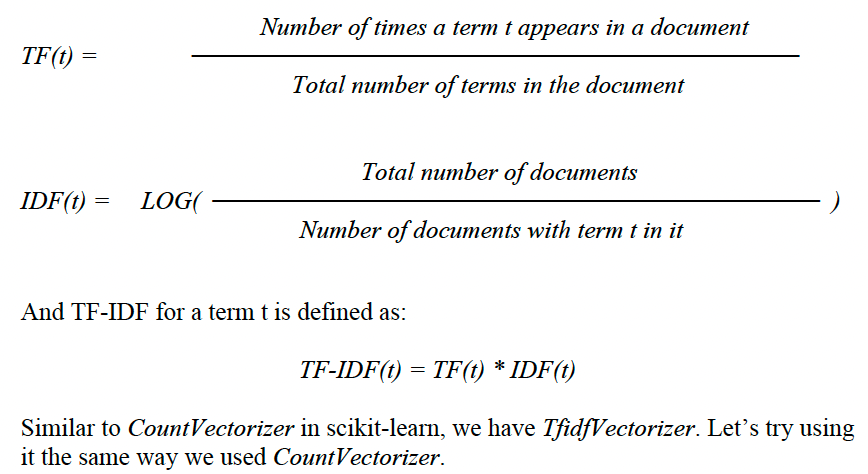

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
tfv = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)
# fit the vectorizer on corpus
tfv.fit(corpus)
corpus_transformed = tfv.transform(corpus)
print(corpus_transformed)

  (0, 27)	0.2965698850220162
  (0, 16)	0.4428321995085722
  (0, 14)	0.4428321995085722
  (0, 7)	0.4428321995085722
  (0, 4)	0.35727423026525224
  (0, 2)	0.4428321995085722
  (1, 27)	0.35299699146792735
  (1, 24)	0.2635440111190765
  (1, 22)	0.2635440111190765
  (1, 18)	0.2635440111190765
  (1, 15)	0.2635440111190765
  (1, 13)	0.2635440111190765
  (1, 12)	0.2635440111190765
  (1, 9)	0.2635440111190765
  (1, 8)	0.2635440111190765
  (1, 6)	0.2635440111190765
  (1, 4)	0.42525129752567803
  (1, 3)	0.2635440111190765
  (2, 27)	0.31752680284846835
  (2, 19)	0.4741246485558491
  (2, 11)	0.4741246485558491
  (2, 10)	0.4741246485558491
  (2, 5)	0.4741246485558491
  (3, 25)	0.38775666010579296
  (3, 23)	0.38775666010579296
  (3, 21)	0.38775666010579296
  (3, 20)	0.38775666010579296
  (3, 17)	0.38775666010579296
  (3, 1)	0.38775666010579296
  (3, 0)	0.3128396318588854
  (4, 26)	0.2959842226518677
  (4, 0)	0.9551928286692534


In [60]:
# we go over the folds created
for fold_ in range(5):
    # temporary dataframes for train and test
    train_df = df[df.kfold != fold_].reset_index(drop=True)
    test_df = df[df.kfold == fold_].reset_index(drop=True)
    
    # initialize TfidfVectorizer with NLTK's word_tokenize
    # function as tokenizer
    tfidf_vec = TfidfVectorizer(
    tokenizer=word_tokenize,
    token_pattern=None
    )
    # fit tfidf_vec on training data reviews
    tfidf_vec.fit(train_df.review)
    # transform training and validation data reviews
    xtrain = tfidf_vec.transform(train_df.review)
    xtest = tfidf_vec.transform(test_df.review)
    
    # initialize logistic regression model
    model = linear_model.LogisticRegression()
    
    # fit the model on training data reviews and sentiment
    model.fit(xtrain, train_df.sentiment)
    
    # make predictions on test data
    # threshold for predictions is 0.5
    preds = model.predict(xtest)
    
    # calculate accuracy
    accuracy = metrics.accuracy_score(test_df.sentiment, preds)
    print(f"Fold: {fold_}")
    print(f"Accuracy = {accuracy}")
    print("")

/Users/binilkuriachan/anaconda3/envs/fdpml_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 0
Accuracy = 0.9



/Users/binilkuriachan/anaconda3/envs/fdpml_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 1
Accuracy = 0.8964

Fold: 2
Accuracy = 0.8955

Fold: 3
Accuracy = 0.8991

Fold: 4
Accuracy = 0.8949



In [61]:
from nltk import ngrams
# let's see 3 grams
N = 3
# input sentence
sentence = "hi, how are you?"
# tokenized sentence
tokenized_sentence = word_tokenize(sentence)
# generate n_grams
n_grams = list(ngrams(tokenized_sentence, N))
print(n_grams)

[('hi', ',', 'how'), (',', 'how', 'are'), ('how', 'are', 'you'), ('are', 'you', '?')]


In [62]:
tfidf_vec = TfidfVectorizer(
    tokenizer=word_tokenize,
    token_pattern=None,
    ngram_range=(1, 3)
)

In [63]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

In [64]:
# initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# initialize stemmer
stemmer = SnowballStemmer("english")
words = ["fishing", "fishes", "fished"]
for word in words:
    print(f"word={word}")
    print(f"stemmed_word={stemmer.stem(word)}")
    print(f"lemma={lemmatizer.lemmatize(word)}")
    print("")

word=fishing
stemmed_word=fish
lemma=fishing

word=fishes
stemmed_word=fish
lemma=fish

word=fished
stemmed_word=fish
lemma=fished



In [65]:
# we go over the folds created
for fold_ in range(5):
    # temporary dataframes for train and test
    train_df = df[df.kfold != fold_].reset_index(drop=True)
    test_df = df[df.kfold == fold_].reset_index(drop=True)
    
    # initialize TfidfVectorizer with NLTK's word_tokenize
    # function as tokenizer
    tfidf_vec = TfidfVectorizer(
    tokenizer=word_tokenize,
    token_pattern=None,
    ngram_range=(1, 2)
    )
    # fit tfidf_vec on training data reviews
    tfidf_vec.fit(train_df.review)
    # transform training and validation data reviews
    xtrain = tfidf_vec.transform(train_df.review)
    xtest = tfidf_vec.transform(test_df.review)
    
    # initialize logistic regression model
    model = linear_model.LogisticRegression()
    
    # fit the model on training data reviews and sentiment
    model.fit(xtrain, train_df.sentiment)
    
    # make predictions on test data
    # threshold for predictions is 0.5
    preds = model.predict(xtest)
    
    # calculate accuracy
    accuracy = metrics.accuracy_score(test_df.sentiment, preds)
    print(f"Fold: {fold_}")
    print(f"Accuracy = {accuracy}")
    print("")

Fold: 0
Accuracy = 0.9014

Fold: 1
Accuracy = 0.9011

Fold: 2
Accuracy = 0.896



/Users/binilkuriachan/anaconda3/envs/fdpml_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 3
Accuracy = 0.9003

Fold: 4
Accuracy = 0.8976

